# Stackoverflow survey 2022
Let's import the libraries and load the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [2]:
df = pd.read_csv('data/survey_2022.csv')

In [3]:
fd = pd.read_csv('data/schema_2022.csv')

In [4]:
df.head()

,Unnamed: 0,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [5]:
fd.head(7)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
6,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR


In [6]:
df.columns

Index(['Unnamed: 0', 'ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeSta

In [7]:
fd.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR


I will use the next function to explore the questions in the data set.

In [8]:
def informacion(preg):
    return fd.query('qname == "{}"'.format(preg))['question'].iloc[0]


# Salary
I am going to combine the 'CompTotal' and 'CompFreq' columns to get a total salary

In [9]:
dfsalary = df.copy()

In [10]:
dfsalary['CompTotal'].isna().sum()/dfsalary.shape[0]

0.47605555555555557

In [11]:
dfsalary['CompFreq'].isna().sum()/dfsalary.shape[0]

0.394125

It is observed that more than 47 % of the data is missing. This is possibly caused because the employees didn't want to answer this question.
I am going now to drop this registers.

In [12]:
dfsalary = dfsalary.dropna(subset=['CompTotal'], axis=0)

In [13]:
dfsalary['CompFreq'].isna().sum()/dfsalary.shape[0]

0.001961615947407486

A small porcentage of surveyed filled the 'CompTotal', but not the 'CompFreq'.  
Since it is a very small porcentage, I will drop this data.

In [14]:
dfsalary = dfsalary.dropna(subset=['CompFreq'], axis=0)

In [15]:
dfsalary['CompTotal'].describe()

count    3.765000e+04
mean     2.390465e+52
std      4.638313e+54
min      0.000000e+00
25%      3.000000e+04
50%      7.724750e+04
75%      1.540000e+05
max      9.000000e+56
Name: CompTotal, dtype: float64

Here, it can be seen that there are extreme values that have no sense: $9 \cdot 10^{56}$ \\$

In [16]:
dfsalary['CompTotal'].sort_values(ascending=False)

35786    9.000000e+56
3068     1.000000e+52
70597    1.000000e+22
17567    1.000000e+15
19244    5.000000e+12
             ...     
55790    0.000000e+00
23041    0.000000e+00
22777    0.000000e+00
2737     0.000000e+00
49816    0.000000e+00
Name: CompTotal, Length: 37650, dtype: float64

Some employees report salaries too high to be true, and some of them report 0 \\$.  
I am going to compute a new column for the total salary, by multiplying 'CompTotal' and 'CompFreq'.  
In order to do so, I will convert the frequency column into a dictionary with numerical values:  
'Yearly':1, 'Monthly':12, 'Weekly':52  
Then, I will clean the extremes values.

In [17]:
dfsalary['CompFreq'].unique()

array(['Yearly', 'Monthly', 'Weekly'], dtype=object)

In [18]:
conversion = {'Yearly':1, 'Monthly':12, 'Weekly':52, np.nan:0}

In [19]:
dfsalary['CompFreq'] = dfsalary['CompFreq'].map(conversion)

In [20]:
dfsalary['Salary'] = df['CompTotal'] * dfsalary['CompFreq']

In [21]:
dfsalary[['CompTotal','CompFreq','Salary']]

,CompTotal,CompFreq,Salary
2,32000.0,1,32000.0
3,60000.0,12,720000.0
8,46000.0,1,46000.0
10,48000.0,1,48000.0
11,194400.0,1,194400.0
...,...,...,...
71989,183000.0,1,183000.0
71990,60000.0,1,60000.0
71992,260000.0,1,260000.0
71996,9000.0,12,108000.0


In [22]:
(dfsalary['Salary']==0).sum()

77

There are 77 surveyed that report a 0 \\$ salary.  
I will erase those records.

In [23]:
dfsalary = dfsalary[dfsalary['Salary']>0]

In [24]:
dfsalary[['CompTotal','CompFreq','Salary']].describe()

,CompTotal,CompFreq,Salary
count,3.757300e+04,37573.000000,3.757300e+04
mean,2.395364e+52,6.351609,1.245589e+54
std,4.643063e+54,8.595497,2.414393e+56
min,1.000000e+00,1.000000,1.000000e+00
25%,3.000000e+04,1.000000,6.000000e+04
50%,7.800000e+04,1.000000,1.216360e+05
75%,1.550000e+05,12.000000,3.720000e+05
max,9.000000e+56,52.000000,4.680000e+58


In order to get a clearer graph, I am going to clean the upper extreme values.  
In these data, given the private nature of the question (salary), there are many wrong answers that can be interpreted as a refusal to reply.  
So I will leave out of the graph all the outlayers

In [25]:
upperlim = 150000

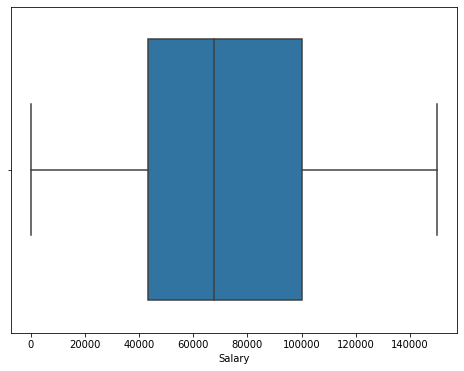

In [26]:
plt.figure(figsize=(8,6));
sns.boxplot(x = dfsalary[dfsalary['Salary']<upperlim]['Salary'],fliersize=2);

However, for the histogram I will represent some more data.

In [27]:
upperlimhist = 400000

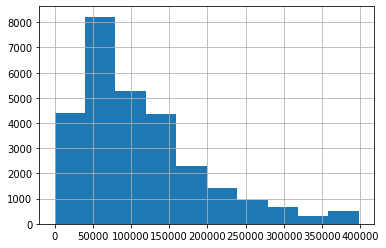

In [28]:
dfsalary[dfsalary['Salary']<upperlimhist]['Salary'].hist();

In [29]:
dfsalary[dfsalary['Salary']<upperlimhist]['Salary'].describe()

count     28346.000000
mean     109732.371410
std       79272.758284
min           1.000000
25%       50400.000000
50%       90000.000000
75%      150000.000000
max      398400.000000
Name: Salary, dtype: float64

Given that the mean is very sensitive to extreme values, and the maximum value that we find in the salary is $10^{52}$, I must be very careful when studying the mean salary.  
I should remove those values that are too high, even when I am not sure if I am also removing some genuine values.

## Education Level
Now let's study the education level of the employees

In [30]:
dfsalary['EdLevel'].isna().sum()

17

There are 17 records without `Education level`, so I delete them

In [31]:
# dfsalary = dfsalary.dropna(subset=['Edlevel'], axis=0)
dfsalary = dfsalary.dropna(subset=['EdLevel'])

Let's take a look of the distribution of these values:

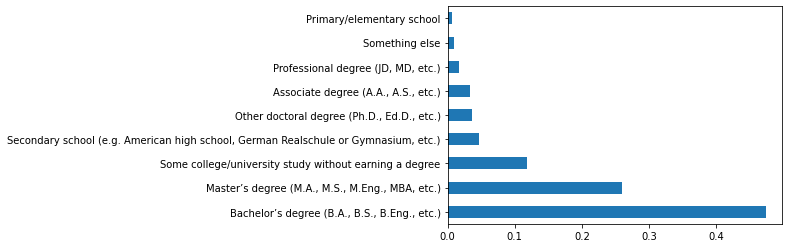

In [32]:
(dfsalary['EdLevel'].value_counts()/dfsalary.shape[0]).plot(kind='barh',);

Let's study the salary again, by grouping `Education Level`, to see if we can find any relationship between the two variables.

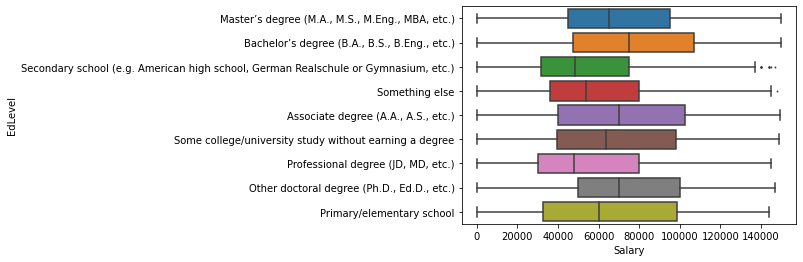

In [33]:
sns.boxplot(x=dfsalary[dfsalary['Salary']<upperlim]['Salary'], y = dfsalary['EdLevel'],fliersize = 1);

It looks like there's no relationship between `salary` and `Education Level`.
But the names in the graph are too long, let's fix this.  
Let's define a function that will take only the two first words of each entry, for instance:  
**Master's degree (M.A., M.S.m M.Eng., MBA, etc)** becomes **Master's degree**

In [34]:
recortado = list(dfsalary['EdLevel'].unique())
# recortado = []
for i,estudio in enumerate(dfsalary['EdLevel'].unique()):
    recortado[i] = estudio.split()[0] + ' ' + estudio.split()[1]
#     print(estudio)
recortado
def trans(texto):
    traduccion = {x:y for x,y in zip(list(dfsalary['EdLevel'].unique()),recortado)}
    return traduccion[texto]

In [35]:
dfsalary['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

Those are the values before transformation

In [36]:
dfsalary['EdLevel'] = dfsalary['EdLevel'].apply(trans)

In [37]:
dfsalary['EdLevel'].nunique

<bound method IndexOpsMixin.nunique of 2                  Master’s degree
3                Bachelor’s degree
8                  Master’s degree
10               Bachelor’s degree
11               Bachelor’s degree
                   ...            
71989    Primary/elementary school
71990             Secondary school
71992              Master’s degree
71996      Some college/university
71999              Master’s degree
Name: EdLevel, Length: 37556, dtype: object>

And those are the values after the transformation

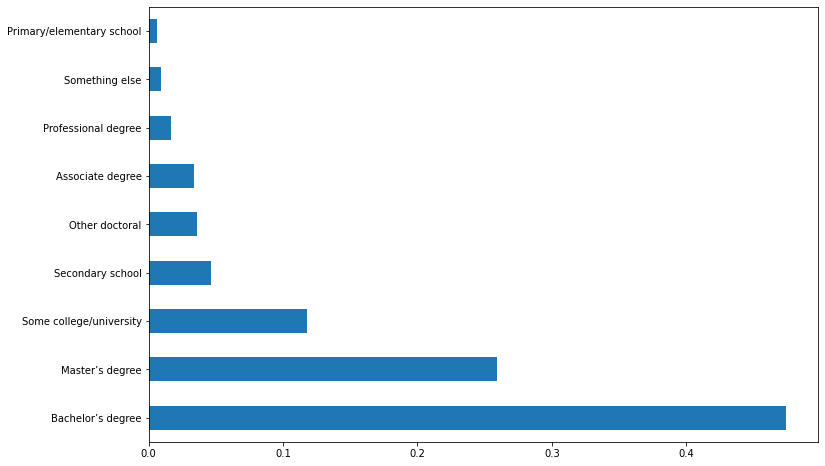

In [38]:
plt.figure(figsize=(12,8));
(dfsalary['EdLevel'].value_counts()/dfsalary.shape[0]).plot(kind='barh');

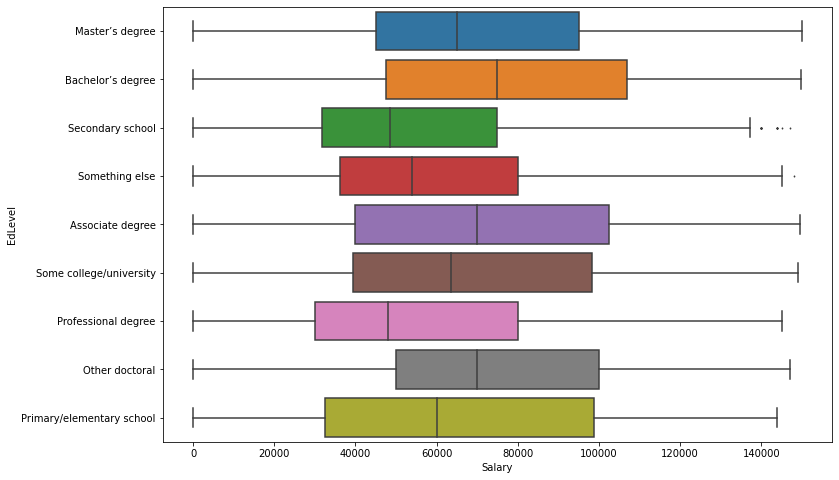

In [39]:
plt.figure(figsize=(12,8));
sns.boxplot(x=dfsalary[dfsalary['Salary']<upperlim]['Salary'], y = dfsalary['EdLevel'],fliersize = 1);

## Remote work
I want to check how the situation is after the pandemic, and if remote work had become the standard.

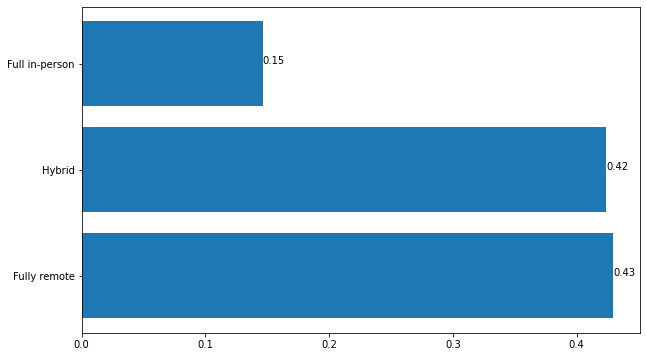

In [40]:
remoto = (df['RemoteWork'][df['RemoteWork'].notna()].value_counts()/df['RemoteWork'].notna().sum())
remoto.index = ['Fully remote', 'Hybrid','Full in-person']
plt.figure(figsize = (10,6))
plt.barh(remoto.index,remoto)
for index , value in enumerate(remoto):
    plt.text(value,index, str(np.round(value,2)))


This simple graph shows that the answer is a big yes.

# Years of experience in coding

Let's compare the `YearsCode` and `YearsCodePro` columns, to see how much time took for the developers, to become proffessionals.  
Let's create a new copy of the data set.

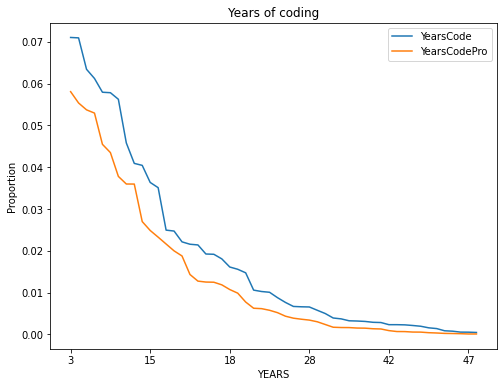

In [41]:
programando = df.copy()
plt.legend('Years coding')
(programando['YearsCode'].value_counts()/programando.shape[0]).plot(figsize=(8,6));
(programando['YearsCodePro'].value_counts()/programando.shape[0]).plot();
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Years of coding')
plt.xlabel('YEARS')
plt.ylabel('Proportion')
plt.show()

It is shown that YearsCode es highter than YearsCodePro, as espected.

### Creating a new column with the time that took to become pro
I want to subtract the YearsCode and YearsCodePro columns.  
There are several problems:   
The years are registered as strings.  
This can solved because the string "3" is easily convertible to the integer `3`  
There are two values that will give us problems with this approach:  
"Less than 1 year" and "More than 50 years"  
To solve this let's create a function that maps the entire column. 

In [42]:
programando[['YearsCode','YearsCodePro']].head()

,YearsCode,YearsCodePro
0,NaN,NaN
1,NaN,NaN
2,14,5
3,20,17
4,8,3


#### For this it's needed to take care of some problems:
- Null values
- Str values that we cannot subtract

### Remove null values

In [43]:
programando.isna()[['YearsCode','YearsCodePro']].mean()

YearsCode       0.026222
YearsCodePro    0.292861
dtype: float64

There are a lot of missing values in the `YearsCodePro` (29%).  
Let's check if someone didn't fill that column, but did fill the `YearsCode`.  
That could be a good idea for inputing those values into the missing values of the `YearsCodePro` columns.  
However, in our case, this solution does not work, since we are interested in the difference between these two columns. Inputting these data, the difference would be 0.

In [44]:
programando[(programando['YearsCodePro'].map(lambda x: pd.isna(x))) &
            (programando['YearsCode'].map(lambda x: pd.notna(x)))][['YearsCodePro','YearsCode']].isna().sum()

YearsCodePro    19278
YearsCode           0
dtype: int64

It shows that we could compute a total of 19278 values, but as mentioned before, that solution is not valid in our case.  
Thus, let's delete the missing data.

In [45]:
programando = programando.dropna(subset=['YearsCode','YearsCodePro'])

### Transforming values that cannot operate with
- 'Less than 1 year' will become  **0**
- 'More than 50 years' will become **50**

In [46]:
def traducir(valor):
    if valor == 'Less than 1 year':
        return '0'
    elif valor == 'More than 50 years':
        return '50'
    return valor

In [47]:
programando['YearsCode'] = programando['YearsCode'].apply(traducir)
programando['YearsCodePro'] = programando['YearsCodePro'].apply(traducir)

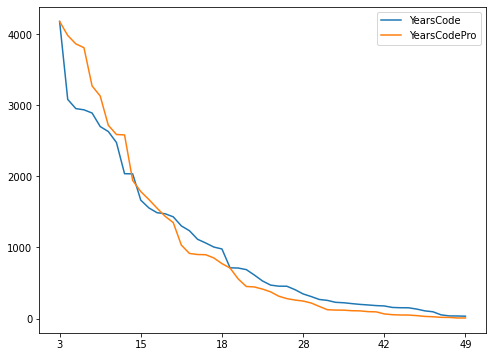

In [48]:
programando['YearsCode'].value_counts().plot(figsize=(8,6));
programando['YearsCodePro'].value_counts().plot();
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


Our chart has changed slightly we adding some 0's that were previously 'less than 1 year'

Let's create a new column resulting from subtracting the columns `['YearsCode']` and `['YearsCodePro']`

Let's check if there is any value indicating that someone has been programming more years as a proffessional developer than years coding in total, which doesn't make sense.

In [49]:
(programando['YearsCodePro'] > programando['YearsCode']).mean()

0.2283117598457725

There is more than 22% of data that does not make sense.  
Let's create the difference column and see what it looks like.

In [50]:
programando['Difference'] = (programando['YearsCode'].astype('int32')  - programando['YearsCodePro'].astype('int32')).astype('object')

In [51]:
programando[['YearsCode','YearsCodePro','Difference']].head(7)

,YearsCode,YearsCodePro,Difference
2,14,5,9
3,20,17,3
4,8,3,5
8,6,6,0
9,37,30,7
10,5,2,3
11,12,10,2


It cannot be appreciated at first sight just by looking within the first rows, but let's search those values where the difference is negative

In [52]:
programando[programando['Difference'].astype('int32') < 0][['YearsCode','YearsCodePro','Difference']]

,YearsCode,YearsCodePro,Difference
259,9,11,-2
455,12,20,-8
911,2,3,-1
1309,12,22,-10
1585,4,15,-11
...,...,...,...
71060,12,15,-3
71113,25,30,-5
71361,2,4,-2
71439,1,5,-4


In [53]:
536/programando.shape[0]

0.010544124011488375

There are 536 values, approx. 1%, whose difference is negative.  
Since this doesn't make sense, let's remove them from the the dataset.

In [54]:
programando = programando[programando['Difference'].astype('int32') >= 0]

In [55]:
programando[['YearsCode','YearsCodePro','Difference']]

,YearsCode,YearsCodePro,Difference
2,14,5,9
3,20,17,3
4,8,3,5
8,6,6,0
9,37,30,7
...,...,...,...
71990,9,7,2
71992,28,14,14
71993,26,22,4
71996,12,10,2


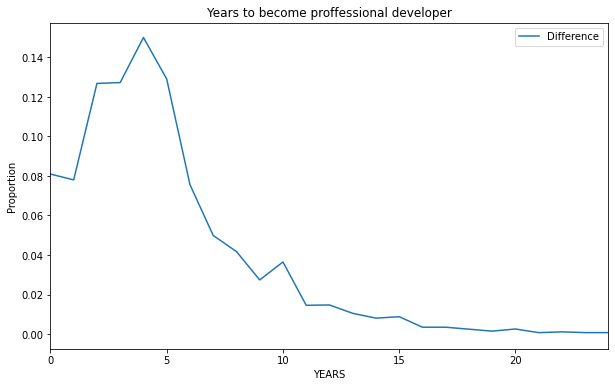

In [56]:
plt.figure(figsize=(10,6));
plt.xlim((0,24));
(programando['Difference'].value_counts().sort_index()/programando.shape[0]).plot();
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Years to become proffessional developer')
plt.xlabel('YEARS')
plt.ylabel('Proportion')
plt.show()

In [57]:
programando['Difference'].astype('int').describe()

count    50298.000000
mean         4.834208
std          3.974266
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         49.000000
Name: Difference, dtype: float64

In summary, the results show that it takes 4.8 years on average to become a professional developer.